In [9]:
input_dir = "/home/ubuntu/chchao/"
BUS_PATH = input_dir + "yelp_dataset/yelp_academic_dataset_business.pickle"
TOR_BUS_PATH = input_dir + "yelp_dataset/yelp_toronto_business.pickle"
VEGAS_BUS_PATH = input_dir + "yelp_dataset/yelp_vegas_business.pickle"
MONTREAL_BUS_PATH = input_dir + "yelp_dataset/yelp_montreal_business.pickle"
PHOENIX_BUS_PATH = input_dir + "yelp_dataset/yelp_phoenix_business.pickle"
BUS_DF = input_dir + "yelp_dataset/df_convert/yelp_academic_dataset_business.pickle"
CITY_LIST = input_dir + "city_cnt_list"

In [11]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn   # This library will help to get the values
from sklearn import metrics

In [13]:
import pickle

def pickle_to_df(pickle_path, verbose=False):
    serial_pickle = pd.read_pickle(pickle_path)
    df = pd.DataFrame.from_dict(serial_pickle, orient='index')
    features = []
    bool_map = {'True': True,'False': False}
    if "business" in pickle_path:
        # print (df.columns.values)
        columns_to_exclude = ['business_id', 'name', 'address', 'is_open']
        # df = df [[df.columns.values]]
        # df = df[['categories', 'review_count', 'stars', 'is_open', 'attributes', 'postal_code']]
        df = df[df['categories'].notnull()] # drop row with null categories
        df = df[df['categories'].str.contains('Restaurant')] # select only rows with restaurant as categories
        la_list = ['stars', 'review_count', 'Ambience_romantic', 'Ambience_intimate', 'Ambience_classy',
 'Ambience_hipster', 'Ambience_touristy', 'Ambience_trendy',
 'Ambience_upscale', 'Ambience_casual', 'BikeParking', 'BusinessAcceptsCreditCards', 'BusinessParking_garage',
 'BusinessParking_street', 'BusinessParking_validated', 'BusinessParking_lot',
 'BusinessParking_valet', 'Caters', 'GoodForKids', 'GoodForMeal_dessert',
 'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
 'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'HasTV', 'OutdoorSeating', 'RestaurantsDelivery',
 'RestaurantsGoodForGroups', 'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut', 'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
 'Music_live', 'Music_video', 'Music_jukebox', 'DogsAllowed', 'Open24Hours', 'RestaurantsCounterService']
        # for col in la_list:
        for col in df.columns.values:
            df[col].map(bool_map)
        
        
        for feature in df.columns:       
            # if feature not in columns_to_exclude:
            if feature in la_list:
                features.append(feature)
        
        # store the df as pickle for use
        df.to_pickle(input_dir + "yelp_dataset/df_convert/" + pickle_path.split('/')[-1])
        return df[features].fillna(-1), df[["is_open"]]

In [14]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

df = pd.read_pickle(BUS_DF)
X, Y = pickle_to_df(BUS_PATH)
# print (X, Y.transpose().values[0])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [18]:
print (df.columns.values)

['latitude' 'city' 'type' 'name' 'business_id' 'stars' 'longitude'
 'address' 'state' 'postal_code' 'hours' 'neighborhood' 'attributes'
 'categories' 'is_open' 'review_count' 'BusinessParking_valet'
 'BusinessParking_garage' 'BusinessParking_lot' 'WheelchairAccessible'
 'RestaurantsPriceRange2' 'BusinessParking_validated'
 'BusinessAcceptsCreditCards' 'BusinessParking_street' 'BikeParking'
 'RestaurantsReservations' 'GoodForMeal_brunch' 'RestaurantsAttire'
 'GoodForMeal_breakfast' 'GoodForMeal_dessert' 'Caters'
 'RestaurantsTakeOut' 'RestaurantsGoodForGroups' 'GoodForMeal_lunch'
 'GoodForKids' 'GoodForMeal_dinner' 'Alcohol' 'GoodForMeal_latenight'
 'RestaurantsDelivery' 'DriveThru' 'RestaurantsTableService'
 'OutdoorSeating' 'Ambience_divey' 'Ambience_intimate' 'Ambience_romantic'
 'Ambience_touristy' 'NoiseLevel' 'Ambience_casual' 'WiFi'
 'Ambience_trendy' 'Ambience_upscale' 'HasTV' 'Ambience_classy'
 'Ambience_hipster' 'BusinessAcceptsBitcoin' 'ByAppointmentOnly'
 'DogsAllowed' 'Hair

In [6]:
tree_model = DecisionTreeClassifier(max_depth=14, min_samples_leaf=32, criterion="entropy",min_samples_split=256, class_weight=None)
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=32,
            min_samples_split=256, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
tree_model.score(X_test,Y_test)

0.84122401847575057

In [13]:
tree_data_accuracy =\
print ( "Accuracy on training = %.6f" % metrics.accuracy_score(tree_model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.6f" % metrics.accuracy_score(tree_model.predict(X_test), Y_test) )

vegas_X, vegas_Y = pickle_to_df(VEGAS_BUS_PATH)
print ( "Accuracy on Vegas = %.6f" % metrics.accuracy_score(tree_model.predict(vegas_X), vegas_Y) )

pho_X, pho_Y = pickle_to_df(PHOENIX_BUS_PATH)
print ( "Accuracy on Phoenix = %.6f" % metrics.accuracy_score(tree_model.predict(pho_X), pho_Y) )

# mon_X, mon_Y = pickle_to_df(MONTREAL_BUS_PATH)
# print ( "Accuracy on Montreal = %.6f" % metrics.accuracy_score(tree_model.predict(mon_X), mon_Y) )

tor_X, tor_Y = pickle_to_df(TOR_BUS_PATH)
print ( "Accuracy on Toronto = %.6f" % metrics.accuracy_score(tree_model.predict(tor_X), tor_Y) )

Accuracy on training = 0.842393
Accuracy on test = 0.841224
Accuracy on Vegas = 0.710289
Accuracy on Phoenix = 0.687817
Accuracy on Toronto = 0.718500


In [38]:
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
fig, ax = plt.subplots(figsize=(10,20))

In [39]:
m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-126., llcrnrlat= 25, urcrnrlon=-71, urcrnrlat=52)


In [47]:
m.drawmapboundary(fill_color='#46bcec')
# m.drawmapboundary(get_facecolor='#46bcec')

m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


/home/ubuntu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/ubuntu/anaconda3/lib/p

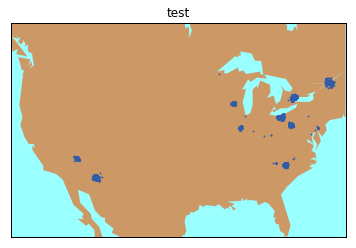

In [76]:
markersize = 1
# markertype = ','  # pixel
markercolor = '#325CA9'  # blue
# markercolor = '#444444'  # blue

markeralpha = .8 #  a bit of transparency
locations = [loc for loc in zip(df.longitude.values, df.latitude.values)]
lons, lats = zip(*locations)
x, y = m(lons, lats)
# m.scatter(x, y, markersize, marker=markertype, color=markercolor, alpha=markeralpha)
m.scatter(x, y, markersize, color=markercolor, alpha=markeralpha) 

# m.plot(x, y, 'o', markersize, color='#444444', alpha=0.8)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x, y, markersize, color=markercolor, alpha=markeralpha, zorder=99) 
# m.scatter(x,y,3,marker='o',color='k', zorder=99)
plt.hold(True)
plt.title('test')
plt.show()